# КТ 2

Целевая переменная - price

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.decomposition import PCA

import shap

import eli5
from eli5.sklearn import PermutationImportance

# Загрузка данных

In [2]:
df_x = pd.read_csv("flight price predict.csv")
df_x

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32
...,...,...,...,...,...,...,...,...,...,...
5693,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3
5694,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24
5695,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8
5696,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42


In [3]:
df_y = pd.read_csv("flight price predict_y.csv")
df_y

,filghtId,price
0,252589,69244
1,223754,52392
2,243398,61933
3,208360,53164
4,247226,42521
...,...,...
5693,272654,61032
5694,294604,60260
5695,219483,51697
5696,287266,51707


In [4]:
df = df_x.merge(df_y, on = "filghtId")
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
5693,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3,61032
5694,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24,60260
5695,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8,51697
5696,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42,51707


Переменные

Количественные:duration, days_left, price

Порядковые:departure_time, stops, arrival_time

Номинальные: filghtId, airline, flight, source_city, destination_city


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filghtId          5698 non-null   int64  
 1   airline           5698 non-null   object 
 2   flight            5698 non-null   object 
 3   source_city       5698 non-null   object 
 4   departure_time    5698 non-null   object 
 5   stops             5698 non-null   object 
 6   arrival_time      5698 non-null   object 
 7   destination_city  5698 non-null   object 
 8   duration          5698 non-null   float64
 9   days_left         5698 non-null   int64  
 10  price             5698 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 534.2+ KB


In [6]:
df.duplicated().sum()

0

Пропуски в данных не обнаружены. Однако нужно закодировать некоторые признаки.

In [7]:
columns = df.columns
for col in columns:
    print(col, df[col].nunique())

filghtId 5698
airline 6
flight 283
source_city 6
departure_time 6
stops 3
arrival_time 6
destination_city 6
duration 333
days_left 49
price 857


In [8]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]= le.fit_transform(df[col])

In [9]:
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,5,189,0,1,0,5,5,13.25,46,69244
1,223754,5,255,2,4,0,2,1,10.42,31,52392
2,243398,5,278,5,5,0,4,1,13.00,28,61933
3,208360,5,196,2,4,0,5,5,12.67,17,53164
4,247226,5,229,0,2,0,4,2,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
5693,272654,1,5,4,4,0,5,1,13.17,3,61032
5694,294604,1,49,1,2,0,4,0,15.92,24,60260
5695,219483,5,275,2,5,0,5,3,23.08,8,51697
5696,287266,5,211,3,4,0,4,1,23.58,42,51707


К зависимым переменным относятся все столбцы, кроме целевой переменной, столбца flightId и flight.

In [10]:
X = df.drop(columns=['price', 'filghtId', 'flight'])
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,5,0,1,0,5,5,13.25,46
1,5,2,4,0,2,1,10.42,31
2,5,5,5,0,4,1,13.00,28
3,5,2,4,0,5,5,12.67,17
4,5,0,2,0,4,2,13.67,32
...,...,...,...,...,...,...,...,...
5693,1,4,4,0,5,1,13.17,3
5694,1,1,2,0,4,0,15.92,24
5695,5,2,5,0,5,3,23.08,8
5696,5,3,4,0,4,1,23.58,42


<AxesSubplot:>

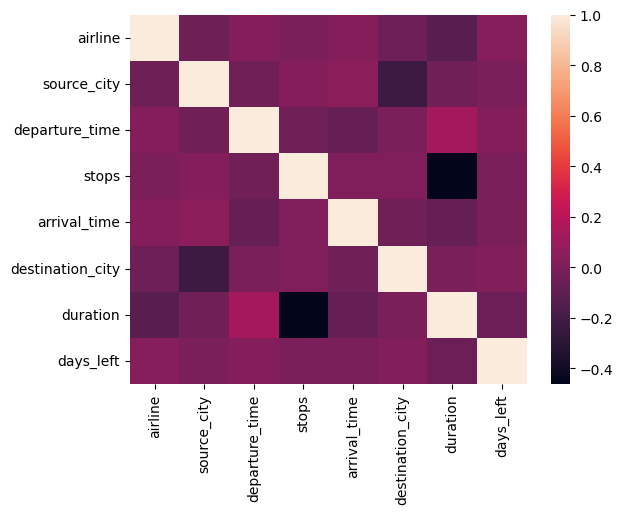

In [11]:
corr = X.corr(method='spearman') 
sns.heatmap(corr)

In [12]:
corr

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
airline,1.000000,-0.055843,0.028758,-0.002631,0.023757,-0.048074,-0.126711,0.033579
source_city,-0.055843,1.000000,-0.035713,0.024728,0.049649,-0.224389,-0.037941,-0.006822
departure_time,0.028758,-0.035713,1.000000,-0.038885,-0.074778,-0.010719,0.126438,0.024784
stops,-0.002631,0.024728,-0.038885,1.000000,0.009381,0.008548,-0.462218,-0.005627
arrival_time,0.023757,0.049649,-0.074778,0.009381,1.000000,-0.037478,-0.074372,-0.004101
destination_city,-0.048074,-0.224389,-0.010719,0.008548,-0.037478,1.000000,-0.010091,0.022777
duration,-0.126711,-0.037941,0.126438,-0.462218,-0.074372,-0.010091,1.000000,-0.060546
days_left,0.033579,-0.006822,0.024784,-0.005627,-0.004101,0.022777,-0.060546,1.000000


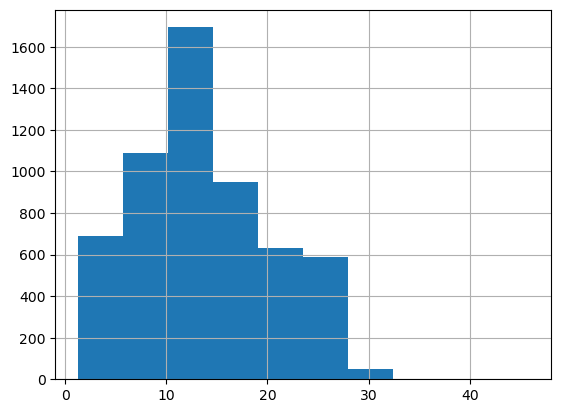

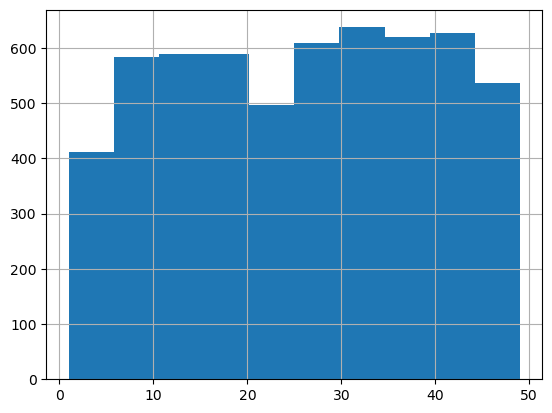

In [13]:
columns = df[['duration', 'days_left']]
for col in columns:
    X[col].hist()
    plt.show()

In [14]:
y = df['price']
y

0       69244
1       52392
2       61933
3       53164
4       42521
        ...  
5693    61032
5694    60260
5695    51697
5696    51707
5697    60508
Name: price, Length: 5698, dtype: int64

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия

In [16]:
st_scaler = StandardScaler()
train_X = st_scaler.fit_transform(train_X)
test_X = st_scaler.transform(test_X)

In [17]:
model = LinearRegression()

In [18]:
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(model.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(model.predict(test_X), test_y)}")

R2 на train: 0.3849156376476629
R2 на test: 0.3654891413409821
MSE на train: 104964006.21892983
MSE на test: 111258671.00866397


In [19]:
pca = PCA(whiten=True)
pca.fit(train_X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.19211046, 0.34883764, 0.48305973, 0.61167378, 0.73422551,
       0.84812464, 0.94147532, 1.        ])

In [20]:
np.where(np.cumsum(pca.explained_variance_ratio_) == 1.)

(array([7], dtype=int64),)

In [21]:
pca = PCA(n_components=7, whiten=True)
pca = pca.fit(train_X)
train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

In [22]:
model_pca = LinearRegression()
model_pca.fit(train_X_pca, train_y)
print(f"R2 на train: {model_pca.score(train_X_pca, train_y)}")
print(f"R2 на test: {model_pca.score(test_X_pca, test_y)}")

R2 на train: 0.336567368762671
R2 на test: 0.3172619370044316


F-statistic

In [23]:
f_statistic, p_values = f_regression(train_X, train_y)

In [24]:
sekector = SelectKBest(f_regression, k=7)
sekector.fit_transform(train_X, train_y)

array([[ 0.73575115,  0.82702719, -0.32243545, ..., -1.45053329,
         0.1087564 ,  1.20534305],
       [-1.36054749, -0.8939848 , -0.32243545, ...,  1.3838707 ,
        -1.01377447, -0.87008465],
       [ 0.73575115, -0.32031414,  3.1851082 , ..., -1.45053329,
        -1.73477342, -0.20298289],
       ...,
       [ 0.73575115, -0.8939848 , -0.32243545, ...,  1.3838707 ,
        -0.22096872, -0.12886047],
       [ 0.73575115, -0.32031414, -0.32243545, ...,  1.3838707 ,
        -1.11195929,  0.76060854],
       [ 0.73575115, -0.32031414, -0.32243545, ..., -1.45053329,
         0.20694122, -0.20298289]])

In [25]:
X_F_result = sekector.get_feature_names_out()
X_F_result

array(['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype=object)

SHAP

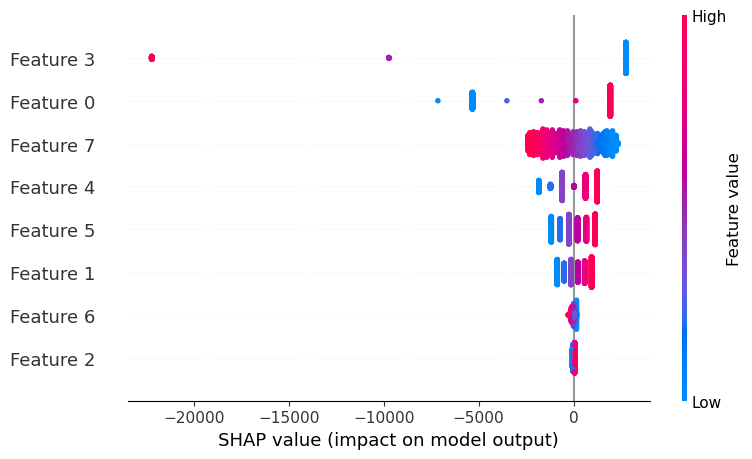

In [26]:
reg = LinearRegression().fit(train_X, train_y)

explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

shap.summary_plot(shap_values, test_X)

eli 5

In [27]:
reg = LinearRegression().fit(train_X, train_y)

In [28]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [29]:
test_X

array([[-1.36054749,  1.38284269, -1.46765547, ..., -1.45053329,
        -0.73387448, -0.72183982],
       [-1.36054749,  0.26001433,  0.82702719, ...,  1.3838707 ,
        -0.70896191,  0.31587403],
       [ 0.73575115,  1.38284269,  0.82702719, ..., -0.3167717 ,
        -1.66150117,  1.13122063],
       ...,
       [ 0.73575115,  0.82142851,  0.82702719, ...,  1.3838707 ,
        -0.55069385,  1.13122063],
       [-1.36054749, -0.86281402, -1.46765547, ..., -1.45053329,
         2.05047104,  0.1676292 ],
       [ 0.73575115, -0.86281402, -0.32031414, ...,  0.2501091 ,
         0.35348572,  1.4277103 ]])

In [30]:
eli5.show_weights(perm)

Weight,Feature
0.5357 ± 0.0411,x3
0.1582 ± 0.0148,x0
0.0177 ± 0.0058,x4
0.0158 ± 0.0044,x7
0.0117 ± 0.0051,x5
0.0059 ± 0.0029,x1
0.0004 ± 0.0005,x6
0.0002 ± 0.0003,x2


### Дерево решений

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(train_X, train_y)
predictions = tree.predict(test_X)
print(f"R2 на train: {tree.score(train_X, train_y)}")
print(f"R2 на test: {tree.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(tree.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(tree.predict(test_X), test_y)}")

R2 на train: 0.9995369264182452
R2 на test: 0.44200616989256325
MSE на train: 79023.4011627907
MSE на test: 97841748.68179825


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(train_X, train_y)
predictions = forest.predict(test_X)
print(f"R2 на train: {forest.score(train_X, train_y)}")
print(f"R2 на test: {forest.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(forest.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(forest.predict(test_X), test_y)}")

R2 на train: 0.9434713458542945
R2 на test: 0.66389917938643
MSE на train: 9646601.943521226
MSE на test: 58933791.464840084


### XGBoost 

In [35]:
import xgboost as xgb

In [36]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)
XGB.fit(train_X, train_y)
predictions = XGB.predict(test_X)
print(f"R2 на train: {XGB.score(train_X, train_y)}")
print(f"R2 на test: {XGB.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(XGB.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(XGB.predict(test_X), test_y)}")

R2 на train: 0.6787604881571703
R2 на test: 0.6094914612411177
MSE на train: 54819449.46524561
MSE на test: 68473944.0577438


### Градиентный спуск

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gb = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, max_depth=3)

In [39]:
gb.fit(train_X, train_y)
predictions = gb.predict(test_X)
print(f"R2 на train: {gb.score(train_X, train_y)}")
print(f"R2 на test: {gb.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(gb.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(gb.predict(test_X), test_y)}")

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.


R2 на train: 0.627578721163902
R2 на test: 0.5969681210308468
MSE на train: 63553606.335096024
MSE на test: 70669856.34099264


### CatBoost

In [40]:
import catboost

In [41]:
from catboost import CatBoostRegressor

In [42]:
cb = CatBoostRegressor()

In [43]:
cb.fit(train_X, train_y)
predictions = cb.predict(test_X)
print(f"R2 на train: {cb.score(train_X, train_y)}")
print(f"R2 на test: {cb.score(test_X, test_y)}")
print(f"MSE на train: {mean_squared_error(cb.predict(train_X), train_y)}")
print(f"MSE на test: {mean_squared_error(cb.predict(test_X), test_y)}")

Learning rate set to 0.052031
0:	learn: 12765.4976891	total: 146ms	remaining: 2m 25s
1:	learn: 12480.9400171	total: 148ms	remaining: 1m 14s
2:	learn: 12241.5761074	total: 151ms	remaining: 50.2s
3:	learn: 12021.7069199	total: 154ms	remaining: 38.3s
4:	learn: 11822.2702469	total: 157ms	remaining: 31.3s
5:	learn: 11640.0123204	total: 160ms	remaining: 26.5s
6:	learn: 11460.6636922	total: 163ms	remaining: 23.1s
7:	learn: 11270.3889825	total: 165ms	remaining: 20.5s
8:	learn: 11095.1018042	total: 168ms	remaining: 18.5s
9:	learn: 10943.5703793	total: 171ms	remaining: 16.9s
10:	learn: 10801.0215429	total: 174ms	remaining: 15.6s
11:	learn: 10666.2376123	total: 177ms	remaining: 14.5s
12:	learn: 10525.5300354	total: 179ms	remaining: 13.6s
13:	learn: 10411.6341072	total: 182ms	remaining: 12.8s
14:	learn: 10295.4315759	total: 187ms	remaining: 12.3s
15:	learn: 10180.6718318	total: 190ms	remaining: 11.7s
16:	learn: 10086.8686548	total: 194ms	remaining: 11.2s
17:	learn: 10000.8914840	total: 196ms	remai

210:	learn: 7540.6250971	total: 755ms	remaining: 2.82s
211:	learn: 7537.2961310	total: 758ms	remaining: 2.82s
212:	learn: 7532.3803857	total: 761ms	remaining: 2.81s
213:	learn: 7530.5057286	total: 764ms	remaining: 2.81s
214:	learn: 7525.4055105	total: 767ms	remaining: 2.8s
215:	learn: 7521.7114691	total: 770ms	remaining: 2.8s
216:	learn: 7518.0657707	total: 773ms	remaining: 2.79s
217:	learn: 7516.2121425	total: 776ms	remaining: 2.78s
218:	learn: 7512.6757541	total: 780ms	remaining: 2.78s
219:	learn: 7510.2691237	total: 783ms	remaining: 2.78s
220:	learn: 7507.0013427	total: 787ms	remaining: 2.77s
221:	learn: 7504.7527885	total: 790ms	remaining: 2.77s
222:	learn: 7494.2584925	total: 793ms	remaining: 2.76s
223:	learn: 7486.0219967	total: 796ms	remaining: 2.76s
224:	learn: 7483.2322911	total: 799ms	remaining: 2.75s
225:	learn: 7478.2501615	total: 802ms	remaining: 2.75s
226:	learn: 7474.5852154	total: 805ms	remaining: 2.74s
227:	learn: 7471.9013301	total: 808ms	remaining: 2.73s
228:	learn: 

407:	learn: 6838.1179541	total: 1.32s	remaining: 1.92s
408:	learn: 6832.7789702	total: 1.32s	remaining: 1.91s
409:	learn: 6826.8722620	total: 1.33s	remaining: 1.91s
410:	learn: 6824.4322636	total: 1.33s	remaining: 1.91s
411:	learn: 6821.1510752	total: 1.33s	remaining: 1.9s
412:	learn: 6818.9632798	total: 1.34s	remaining: 1.9s
413:	learn: 6814.7585777	total: 1.34s	remaining: 1.9s
414:	learn: 6811.3607476	total: 1.34s	remaining: 1.89s
415:	learn: 6806.4993832	total: 1.34s	remaining: 1.89s
416:	learn: 6803.7671831	total: 1.35s	remaining: 1.89s
417:	learn: 6800.5886910	total: 1.35s	remaining: 1.88s
418:	learn: 6797.9540182	total: 1.35s	remaining: 1.88s
419:	learn: 6793.5351272	total: 1.36s	remaining: 1.88s
420:	learn: 6790.4012654	total: 1.36s	remaining: 1.87s
421:	learn: 6787.9687686	total: 1.36s	remaining: 1.87s
422:	learn: 6785.7081601	total: 1.37s	remaining: 1.86s
423:	learn: 6780.6557672	total: 1.37s	remaining: 1.86s
424:	learn: 6775.6475888	total: 1.37s	remaining: 1.86s
425:	learn: 6

594:	learn: 6301.3111345	total: 1.87s	remaining: 1.27s
595:	learn: 6297.2912855	total: 1.87s	remaining: 1.27s
596:	learn: 6296.5654493	total: 1.87s	remaining: 1.26s
597:	learn: 6295.5771344	total: 1.88s	remaining: 1.26s
598:	learn: 6293.5958242	total: 1.88s	remaining: 1.26s
599:	learn: 6292.2677947	total: 1.88s	remaining: 1.25s
600:	learn: 6290.2191564	total: 1.89s	remaining: 1.25s
601:	learn: 6286.4366817	total: 1.89s	remaining: 1.25s
602:	learn: 6283.7210904	total: 1.89s	remaining: 1.25s
603:	learn: 6280.5023026	total: 1.9s	remaining: 1.24s
604:	learn: 6279.1041331	total: 1.9s	remaining: 1.24s
605:	learn: 6277.6898520	total: 1.9s	remaining: 1.24s
606:	learn: 6275.3920323	total: 1.91s	remaining: 1.23s
607:	learn: 6272.3143065	total: 1.91s	remaining: 1.23s
608:	learn: 6271.1252938	total: 1.91s	remaining: 1.23s
609:	learn: 6268.6047864	total: 1.91s	remaining: 1.22s
610:	learn: 6267.6466412	total: 1.92s	remaining: 1.22s
611:	learn: 6266.4115074	total: 1.92s	remaining: 1.22s
612:	learn: 6

791:	learn: 5898.5126266	total: 2.42s	remaining: 636ms
792:	learn: 5897.6149864	total: 2.43s	remaining: 633ms
793:	learn: 5896.4611483	total: 2.43s	remaining: 630ms
794:	learn: 5892.6757157	total: 2.43s	remaining: 627ms
795:	learn: 5889.8829098	total: 2.44s	remaining: 624ms
796:	learn: 5887.8136087	total: 2.44s	remaining: 621ms
797:	learn: 5886.4331201	total: 2.44s	remaining: 618ms
798:	learn: 5884.6141647	total: 2.44s	remaining: 615ms
799:	learn: 5883.8860055	total: 2.45s	remaining: 612ms
800:	learn: 5881.0863618	total: 2.45s	remaining: 609ms
801:	learn: 5878.2056523	total: 2.45s	remaining: 606ms
802:	learn: 5876.2015963	total: 2.46s	remaining: 603ms
803:	learn: 5873.7439130	total: 2.46s	remaining: 600ms
804:	learn: 5871.9622776	total: 2.46s	remaining: 597ms
805:	learn: 5870.0992491	total: 2.46s	remaining: 593ms
806:	learn: 5866.8544277	total: 2.47s	remaining: 590ms
807:	learn: 5865.2761045	total: 2.47s	remaining: 587ms
808:	learn: 5863.2095471	total: 2.47s	remaining: 584ms
809:	learn

968:	learn: 5600.3422737	total: 2.97s	remaining: 94.9ms
969:	learn: 5599.8401396	total: 2.97s	remaining: 91.8ms
970:	learn: 5599.5385333	total: 2.97s	remaining: 88.8ms
971:	learn: 5597.9042097	total: 2.98s	remaining: 85.7ms
972:	learn: 5594.6221375	total: 2.98s	remaining: 82.7ms
973:	learn: 5593.4237884	total: 2.98s	remaining: 79.6ms
974:	learn: 5591.0597198	total: 2.98s	remaining: 76.5ms
975:	learn: 5588.9945855	total: 2.99s	remaining: 73.5ms
976:	learn: 5587.6844045	total: 2.99s	remaining: 70.4ms
977:	learn: 5585.8234490	total: 2.99s	remaining: 67.3ms
978:	learn: 5583.7301528	total: 3s	remaining: 64.3ms
979:	learn: 5581.7219121	total: 3s	remaining: 61.2ms
980:	learn: 5581.4307521	total: 3s	remaining: 58.1ms
981:	learn: 5580.7761847	total: 3s	remaining: 55.1ms
982:	learn: 5579.3643154	total: 3.01s	remaining: 52ms
983:	learn: 5578.3628645	total: 3.01s	remaining: 49ms
984:	learn: 5578.1006032	total: 3.01s	remaining: 45.9ms
985:	learn: 5577.3306891	total: 3.02s	remaining: 42.8ms
986:	lea